# Instalando JupySQL

JupySQL permite que você execute SQL e plote conjuntos de dados grandes no Jupyter através dos comandos %sql, %%sql e %sqlplot. JupySQL é compatível com todos os principais bancos de dados (por exemplo, PostgreSQL, MySQL, SQL Server e SQLite), data warehouses (por exemplo, Snowflake, BigQuery, Redshift) e motores embutidos (SQLite e DuckDB).

https://jupysql.ploomber.io/en/latest/quick-start.html

In [ ]:
!pip install jupysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00


In [ ]:
%load_ext sql

#SQLite3

O SQLite3 é um dos sistemas de gerenciamento de banco de dados mais populares e amplamente utilizados. Ele é uma biblioteca leve e autônoma que implementa um banco de dados SQL completo, sem a necessidade de um servidor separado. O SQLite3 é conhecido por sua eficiência, confiabilidade e facilidade de uso. Ele suporta a maioria das operações SQL padrão e é amplamente utilizado em aplicativos móveis, navegadores da web, sistemas embarcados e outros ambientes onde um banco de dados compacto e de alto desempenho é necessário.

https://www.sqlite.org/index.html

#Northwind DB

O banco de dados Northwind é um exemplo de banco de dados fictício frequentemente utilizado em estudos e treinamentos na área de gerenciamento de banco de dados. Ele simula uma empresa de comércio eletrônico, contendo tabelas relacionadas a clientes, produtos, pedidos, fornecedores e funcionários. O banco de dados Northwind é conhecido por sua estrutura simples e abrangente, o que o torna uma ótima ferramenta para aprender e praticar consultas SQL e técnicas de manipulação de dados. É frequentemente utilizado como um ponto de partida para aprender conceitos e práticas de gerenciamento de banco de dados.

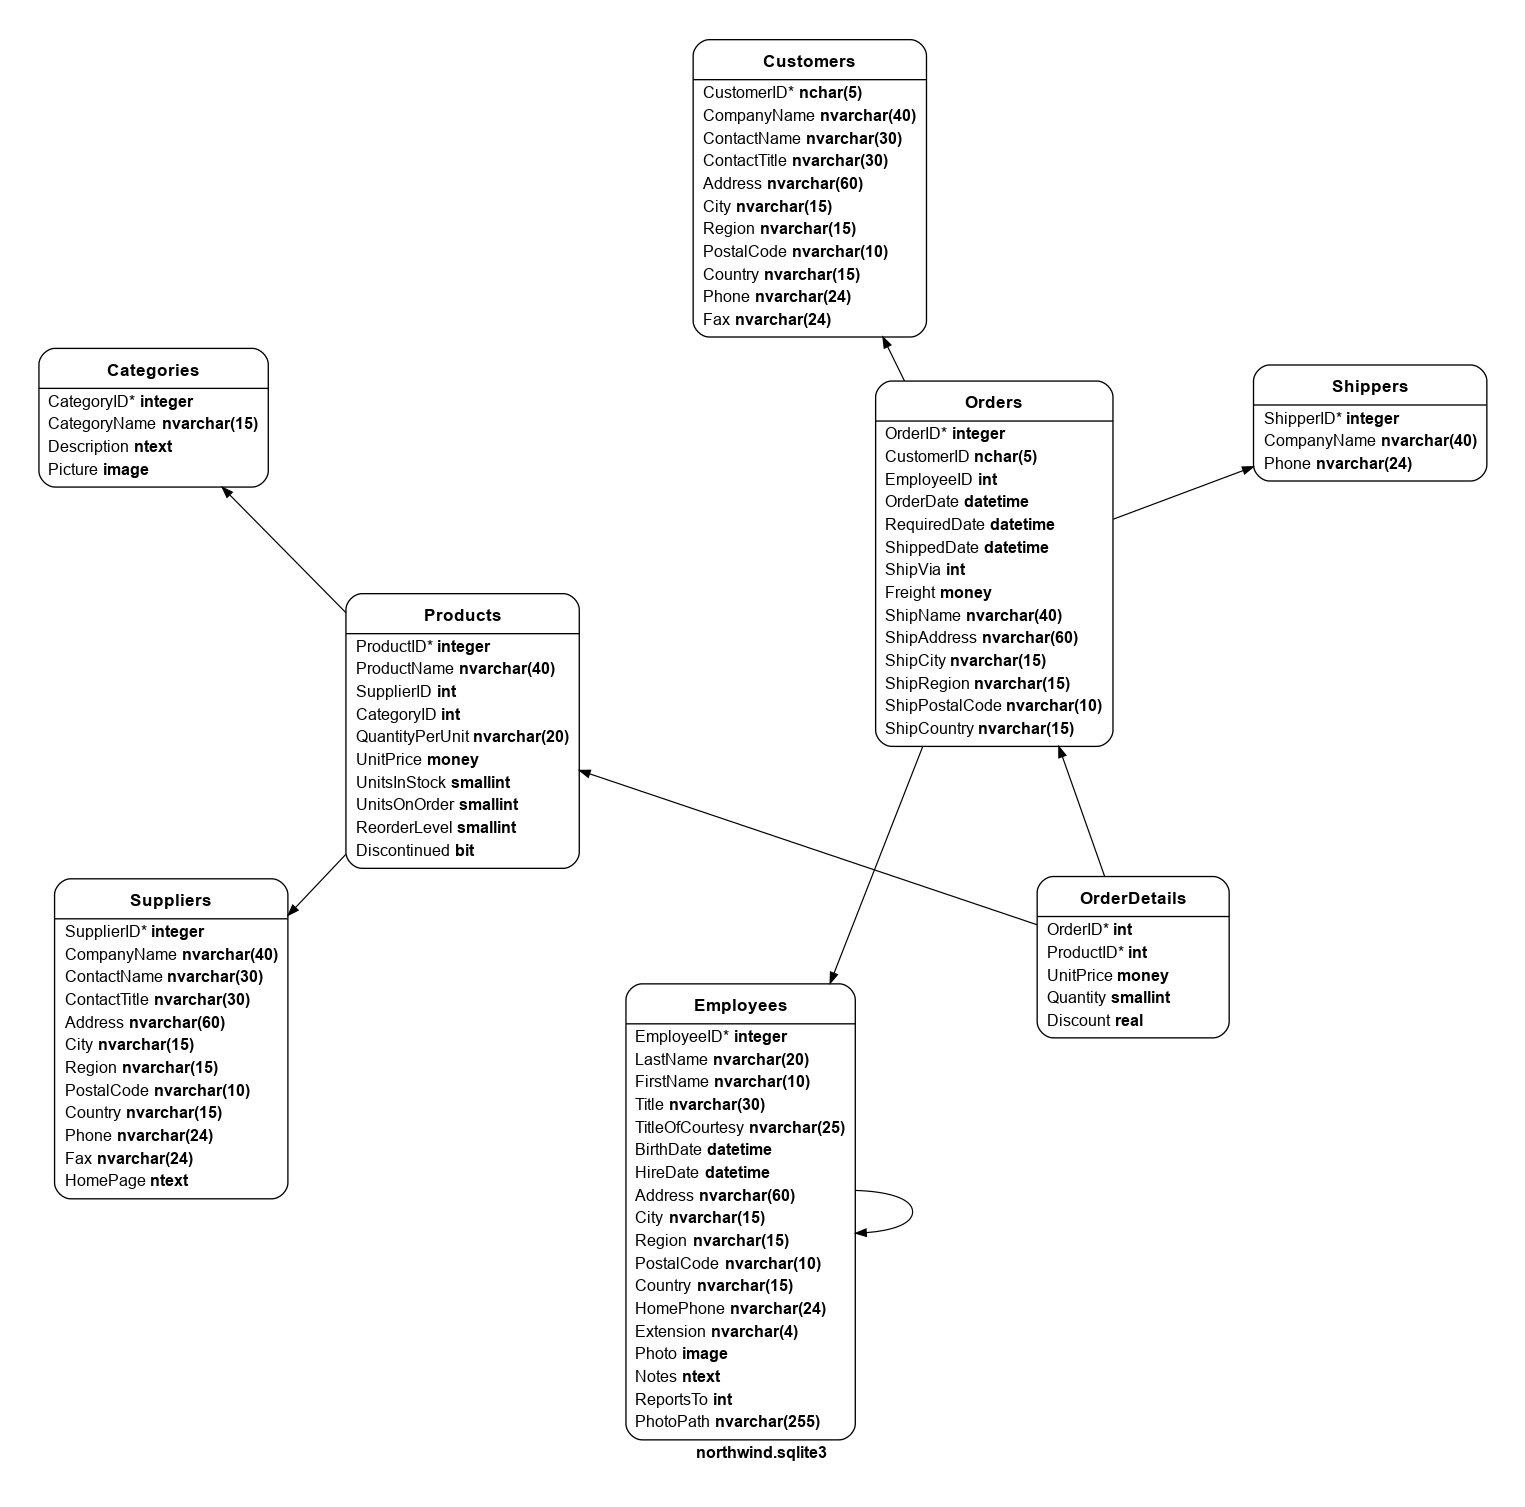

# Conectando no BD Northwind

In [ ]:
!wget https://rtvad.blob.core.windows.net/misc-data/northwind.sqlite3

--2023-08-31 23:50:25--  https://rtvad.blob.core.windows.net/misc-data/northwind.sqlite3
Resolving rtvad.blob.core.windows.net (rtvad.blob.core.windows.net)... 20.60.132.100
Connecting to rtvad.blob.core.windows.net (rtvad.blob.core.windows.net)|20.60.132.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804864 (786K) [application/octet-stream]
Saving to: ‘northwind.sqlite3’

northwind.sqlite3   100%[===================>] 786.00K   478KB/s    in 1.6s    

2023-08-31 23:50:28 (478 KB/s) - ‘northwind.sqlite3’ saved [804864/804864]



In [ ]:
%sql sqlite:///northwind.sqlite3

In [ ]:
%%sql

with Orders2 as (
  select * from Orders
),

OrderDetails2 as (
  select * from OrderDetails
)

create table TABELAO3 as(
select * from Orders2 A
inner join OrderDetails2 B
on A.OrderId = B.OrderID)

Running query in 'sqlite:///northwind.sqlite3'

RuntimeError: If using snippets, you may pass the --with argument explicitly.
For more details please refer: https://jupysql.ploomber.io/en/latest/compose.html#with-argument


Original error message from DB driver:
(sqlite3.OperationalError) near "create": syntax error
[SQL: with Orders2 as (
  select * from Orders
),

OrderDetails2 as (
  select * from OrderDetails
)

create table TABELAO3 as( 
select * from Orders2 A
inner join OrderDetails2 B
on A.OrderId = B.OrderID)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

If you need help solving this issue, send us a message: https://ploomber.io/community


# Consultas

Para escrever uma instrução `SELECT`, você especifica as colunas que deseja recuperar e a(s) tabela(s) para recuperar os dados. Aqui está um exemplo:

```
SELECT column1, column2
FROM tablename;
```
Neste exemplo, `column1` e `column2` são os nomes das colunas que você deseja recuperar do `tablename`. Você também pode utilizar `*` para selecionar todas as colunas da tabela.


In [ ]:
%%sql

select * from Products;

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25,120,0,25,0
7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30,15,0,10,0
8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40,6,0,0,0
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97,29,0,0,1
10,Ikura,4,8,12 - 200 ml jars,31,31,0,0,0


In [ ]:
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)


In [ ]:
%%sql

select * from Products;

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25,120,0,25,0
7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30,15,0,10,0
8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40,6,0,0,0
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97,29,0,0,1
10,Ikura,4,8,12 - 200 ml jars,31,31,0,0,0


In [ ]:
%config SqlMagic.displaylimit = 10

Podemos utilizar o comando `AS` para selecionarmos o nome da coluna resultante de um select

In [ ]:
%%sql

select ProductName as NomeProduto from Products

Running query in 'sqlite:///northwind.sqlite3'

NomeProduto
Alice Mutton
Aniseed Syrup
Boston Crab Meat
Camembert Pierrot
Carnarvon Tigers
Chai
Chang
Chartreuse verte
Chef Anton's Cajun Seasoning
Chef Anton's Gumbo Mix


Também podemos fazer expressões matemáticas no select!

In [ ]:
%%sql

select ProductName as Produto, (UnitsInStock * UnitPrice) as ValorTotalEstoque from Products

Running query in 'sqlite:///northwind.sqlite3'

Produto,ValorTotalEstoque
Chai,702
Chang,323
Aniseed Syrup,130
Chef Anton's Cajun Seasoning,1166
Chef Anton's Gumbo Mix,0.0
Grandma's Boysenberry Spread,3000
Uncle Bob's Organic Dried Pears,450
Northwoods Cranberry Sauce,240
Mishi Kobe Niku,2813
Ikura,961


## Operadores lógicos e de igualdade

Os operadores lógicos são usados para combinar várias condições no SQL. Os operadores lógicos comuns são:

- `AND`: Retorna verdadeiro se ambas as condições forem verdadeiras.
- `OR`: Retorna verdadeiro se pelo menos uma das condições for verdadeira.
- `NOT`: Nega o resultado de uma condição.

Ao especificar condições em SQL, você pode usar operadores de igualdade para comparar valores. Alguns operadores de igualdade comumente usados são:
- `=`: Igual a.
- `<>` ou `!=`: Diferente de.
- `>`: maior do que
- `<`: menor do que






In [ ]:
%%sql

select * from Products
where UnitPrice < 10;

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
13,Konbu,6,8,2 kg box,6,24,0,5,0
19,Teatime Chocolate Biscuits,8,3,10 boxes x 12 pieces,9.2,25,0,5,0
23,Tunnbröd,9,5,12 - 250 g pkgs.,9,61,0,25,0
24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.5,20,0,0,1
33,Geitost,15,4,500 g,2.5,112,0,20,0
41,Jack's New England Clam Chowder,19,8,12 - 12 oz cans,9.65,85,0,10,0
45,Rogede sild,21,8,1k pkg.,9.5,5,70,15,0
47,Zaanse koeken,22,3,10 - 4 oz boxes,9.5,36,0,0,0
52,Filo Mix,24,5,16 - 2 kg boxes,7,38,0,25,0
54,Tourtière,25,6,16 pies,7.45,21,0,10,0


In [ ]:
%%sql

select * from Products
where UnitPrice < 10 and Discontinued = 0;

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
13,Konbu,6,8,2 kg box,6,24,0,5,0
19,Teatime Chocolate Biscuits,8,3,10 boxes x 12 pieces,9.2,25,0,5,0
23,Tunnbröd,9,5,12 - 250 g pkgs.,9,61,0,25,0
33,Geitost,15,4,500 g,2.5,112,0,20,0
41,Jack's New England Clam Chowder,19,8,12 - 12 oz cans,9.65,85,0,10,0
45,Rogede sild,21,8,1k pkg.,9.5,5,70,15,0
47,Zaanse koeken,22,3,10 - 4 oz boxes,9.5,36,0,0,0
52,Filo Mix,24,5,16 - 2 kg boxes,7,38,0,25,0
54,Tourtière,25,6,16 pies,7.45,21,0,10,0
75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0


## Filtrando por coluna

Você pode usar a cláusula WHERE para filtrar o resultado de uma instrução `SELECT` com base em uma condição. Aqui está um exemplo:
```
SELECT column1, column2
FROM tablename
WHERE condition;
```
Neste exemplo, `condição` é a expressão que filtra as linhas retornadas pela instrução `SELECT`.



In [ ]:
%%sql

select * from Products
where UnitPrice = 18;

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
35,Steeleye Stout,16,1,24 - 12 oz bottles,18,20,0,15,0
39,Chartreuse verte,18,1,750 cc per bottle,18,69,0,5,0
76,Lakkalikööri,23,1,500 ml,18,57,0,20,0


## Valores nulos - is & not

No SQLite3, os operadores `IS` e `IS NOT` são utilizados para realizar comparações de igualdade ou não nula entre valores. O operador `IS` verifica se dois valores são iguais ou se ambos são nulos, enquanto o operador `IS NOT` verifica se os valores são diferentes ou se pelo menos um deles não é nulo. É importante notar que esses operadores são usados especificamente para comparações com valores nulos, pois o operador de igualdade (=) não pode ser usado para comparar com valores nulos diretamente. Os operadores `IS` e `IS NOT` são úteis para realizar consultas e filtrar dados quando se deseja verificar se um valor é nulo ou não nulo em um banco de dados SQLite3.

In [ ]:
%%sql

select * from Products
where ProductName is null;

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued


In [ ]:
%%sql

select * from Products
where ProductName is not null;

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25,120,0,25,0
7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30,15,0,10,0
8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40,6,0,0,0
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97,29,0,0,1
10,Ikura,4,8,12 - 200 ml jars,31,31,0,0,0


## Order by

Você pode usar a cláusula `ORDER BY` para classificar o resultado de uma instrução `SELECT`. Aqui está um exemplo:
```
SELECT column1, column2
FROM tablename
ORDER BY column1 ASC;
```
Neste exemplo, o resultado será classificado em ordem crescente com base na `coluna1`. Você também pode usar `DESC` para ordem decrescente.


In [ ]:
%%sql

select * from Products
order by UnitPrice asc;

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
33,Geitost,15,4,500 g,2.5,112,0,20,0
24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.5,20,0,0,1
13,Konbu,6,8,2 kg box,6,24,0,5,0
52,Filo Mix,24,5,16 - 2 kg boxes,7,38,0,25,0
54,Tourtière,25,6,16 pies,7.45,21,0,10,0
75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
23,Tunnbröd,9,5,12 - 250 g pkgs.,9,61,0,25,0
19,Teatime Chocolate Biscuits,8,3,10 boxes x 12 pieces,9.2,25,0,5,0
45,Rogede sild,21,8,1k pkg.,9.5,5,70,15,0
47,Zaanse koeken,22,3,10 - 4 oz boxes,9.5,36,0,0,0


## Like e Ilike

O operador `LIKE` é usado para filtrar dados com base em uma condição de correspondência de padrão. Normalmente é usado com o caractere curinga `%`. Aqui está um exemplo:

```
SELECT column1, column2
FROM tablename
WHERE column1 LIKE 'start%';
```

Neste exemplo, o resultado incluirá linhas onde `column1` começa com os caracteres 'pattern'.

A função do operador `ILIKE` no SQLite 3 é fazer uma correspondência de padrões insensível a maiúsculas e minúsculas. Ele permite realizar consultas de busca de texto de forma flexível, sem considerar as diferenças entre letras maiúsculas e minúsculas. No entanto, é importante destacar que, diferentemente de outros bancos de dados, como o PostgreSQL, no SQLite 3 não há uma distinção explícita entre os operadores LIKE e ILIKE, e ambos são sensíveis a maiúsculas e minúsculas.



In [ ]:
%%sql

select * from Products
where ProductName like '%chocolate biscuits'

Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
19,Teatime Chocolate Biscuits,8,3,10 boxes x 12 pieces,9.2,25,0,5,0


## In

O operador `IN` é usado para especificar vários valores possíveis em uma instrução `SELECT`. Aqui está um exemplo:

SELECT column1, column2
FROM tablename
WHERE column1 IN (value1, value2, value3);

Neste exemplo, o resultado incluirá linhas em que `column1` é igual a `value1`, `value2` ou `value3`.


In [ ]:
%%sql

select * from Customers

Running query in 'sqlite:///northwind.sqlite3'

CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [ ]:
%%sql

select * from Customers
where ContactTitle in ('Owner', 'Marketing Manager')

Running query in 'sqlite:///northwind.sqlite3'

CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
CENTC,Centro comercial Moctezuma,Francisco Chang,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,Bern,None,3012,Switzerland,0452-076545,None
DUMON,Du monde entier,Janine Labrune,Owner,"67, rue des Cinquante Otages",Nantes,None,44000,France,40.67.88.88,40.67.89.89
FOLKO,Folk och fä HB,Maria Larsson,Owner,Åkergatan 24,Bräcke,None,S-844 67,Sweden,0695-34 67 21,None
FRANK,Frankenversand,Peter Franken,Marketing Manager,Berliner Platz 43,München,None,80805,Germany,089-0877310,089-0877451


## Distinct

A palavra-chave `DISTINCT` recupera apenas valores exclusivos para uma coluna no resultado. Aqui está um exemplo:

```
SELECT DISTINCT column1
FROM tablename;
```

Neste exemplo, o resultado incluirá apenas valores exclusivos para `column1`.


In [ ]:
%%sql

select distinct ContactTitle from Customers


Running query in 'sqlite:///northwind.sqlite3'

ContactTitle
Sales Representative
Owner
Order Administrator
Marketing Manager
Accounting Manager
Sales Agent
Sales Associate
Sales Manager
Marketing Assistant
Assistant Sales Agent


## Limit

Você pode usar a cláusula LIMIT para limitar o número de linhas retornadas por uma instrução `SELECT`. Aqui está um exemplo:

```
SELECT column1, column2
FROM tablename
LIMIT n;
```

Neste exemplo, `n` é o número máximo de linhas a serem incluídas no resultado.



In [ ]:
%%sql

select * from Customers
limit 3;

Running query in 'sqlite:///northwind.sqlite3'

CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None


## Between

O operador "BETWEEN" no SQLite 3 é usado para fazer consultas que envolvem a comparação de valores dentro de um intervalo específico. Por exemplo, podemos usar o operador "BETWEEN" para selecionar funcionários com salários entre 2000 e 3000 em uma tabela chamada "Employees". É possível combinar o operador "BETWEEN" com outros operadores lógicos, como "AND" e "OR", para criar consultas mais complexas.


```
SELECT column_name(s)
FROM table_name
WHERE value BETWEEN lower_limit AND upper_limit;


In [ ]:
%%sql

select * from Employees
where HireDate between '2010-01-01' and '2010-05-01'

Running query in 'sqlite:///northwind.sqlite3'

+------------+-----------+-----------+----------------------+-----------------+-------------------------+-------------------------+--------------------+----------+--------+------------+---------+----------------+-----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------